<a href="https://colab.research.google.com/github/seiji0203/LSTM_-/blob/master/candle2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import talib as ta
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import mplfinance as mpf

In [ ]:
start = '2021-01-01'
end = '2022-01-01'

df = data.DataReader('^N225', 'yahoo', start, end)

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,27602.109375,27042.320312,27575.570312,27258.380859,51500000,27258.380859
2021-01-05,27279.779297,27073.460938,27151.380859,27158.630859,55000000,27158.630859
2021-01-06,27196.400391,27002.179688,27102.849609,27055.939453,72700000,27055.939453
2021-01-07,27624.730469,27340.460938,27340.460938,27490.130859,98900000,27490.130859
2021-01-08,28139.029297,27667.750000,27720.140625,28139.029297,84900000,28139.029297


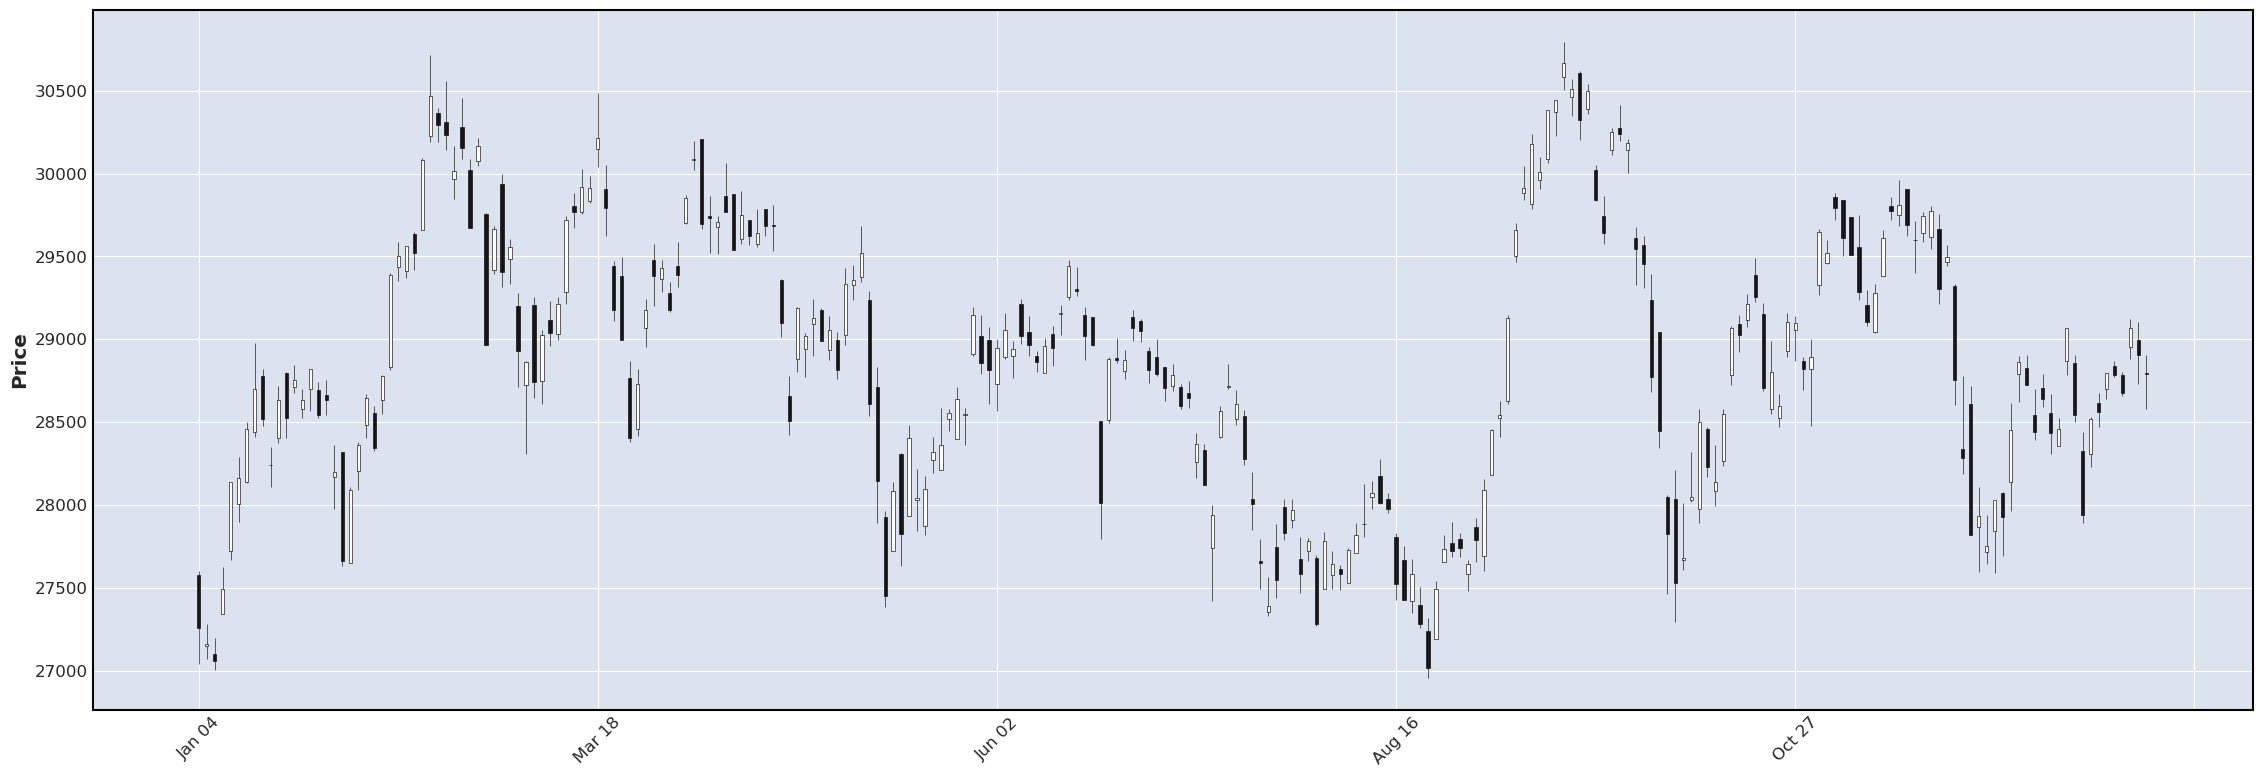

In [ ]:
mpf.plot(df, type='candle', figsize=(30,10))

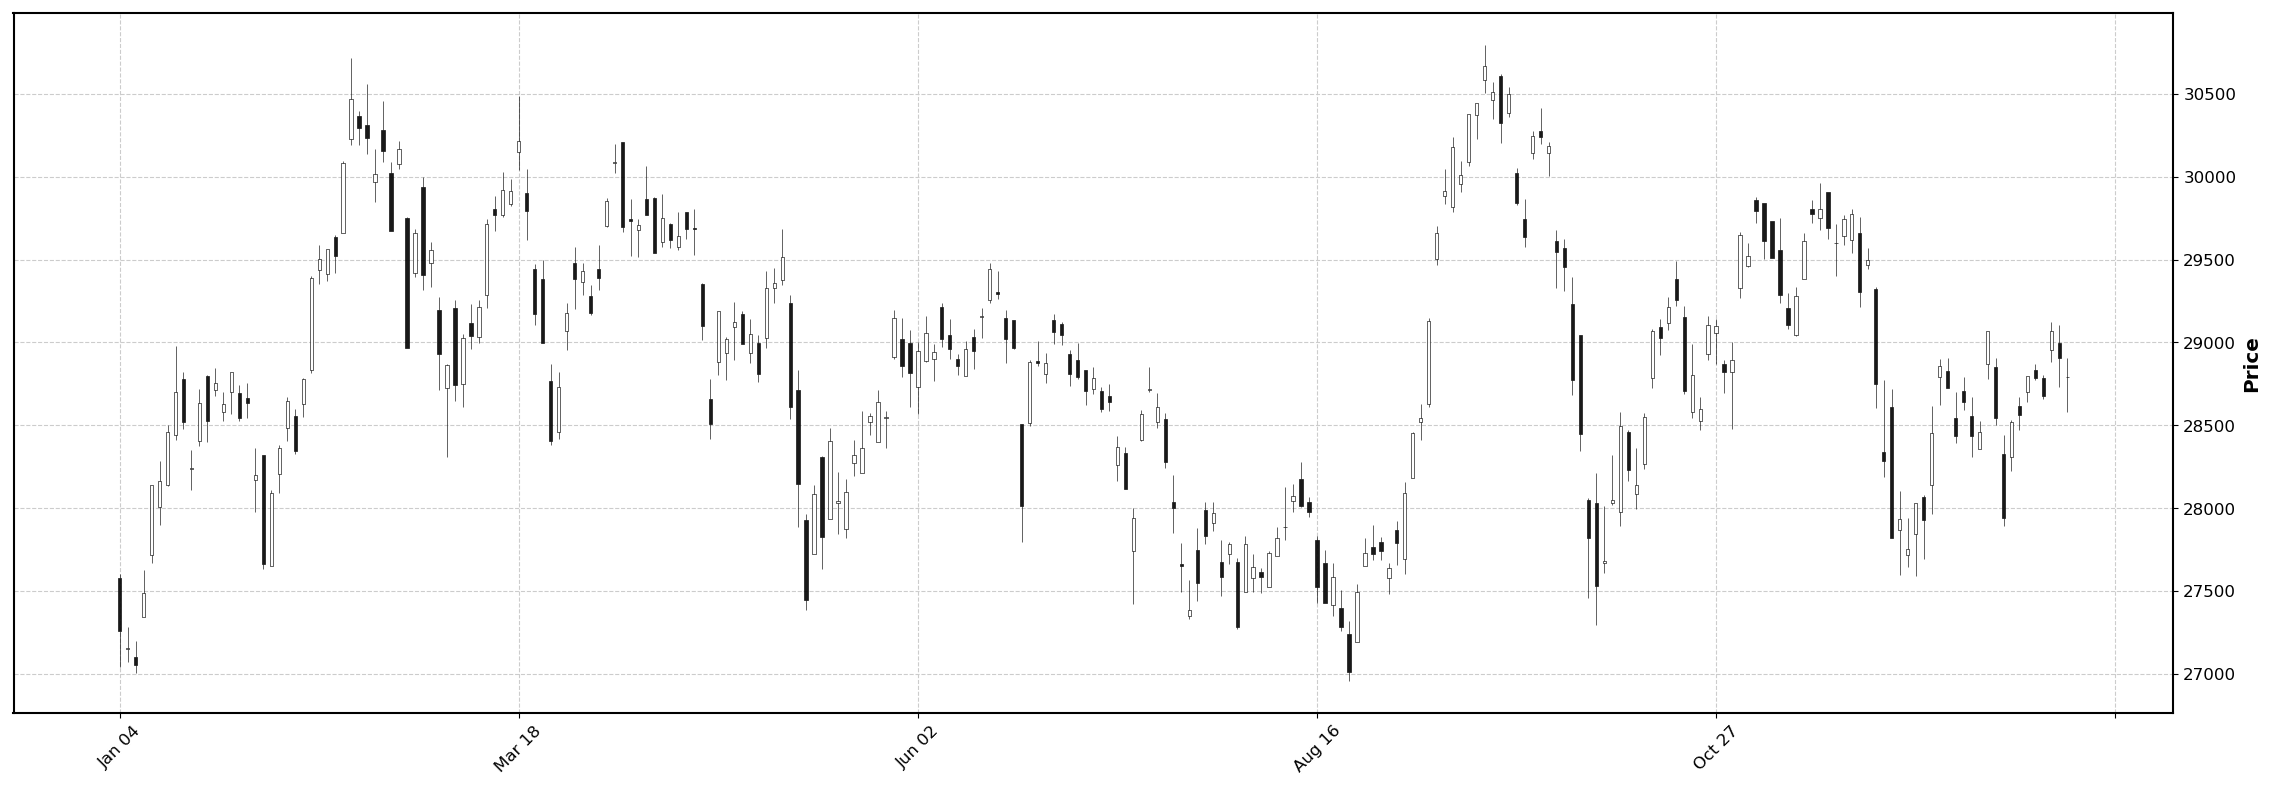

In [ ]:
mpf.plot(df, type='candle', figsize=(30,10), style='classic')

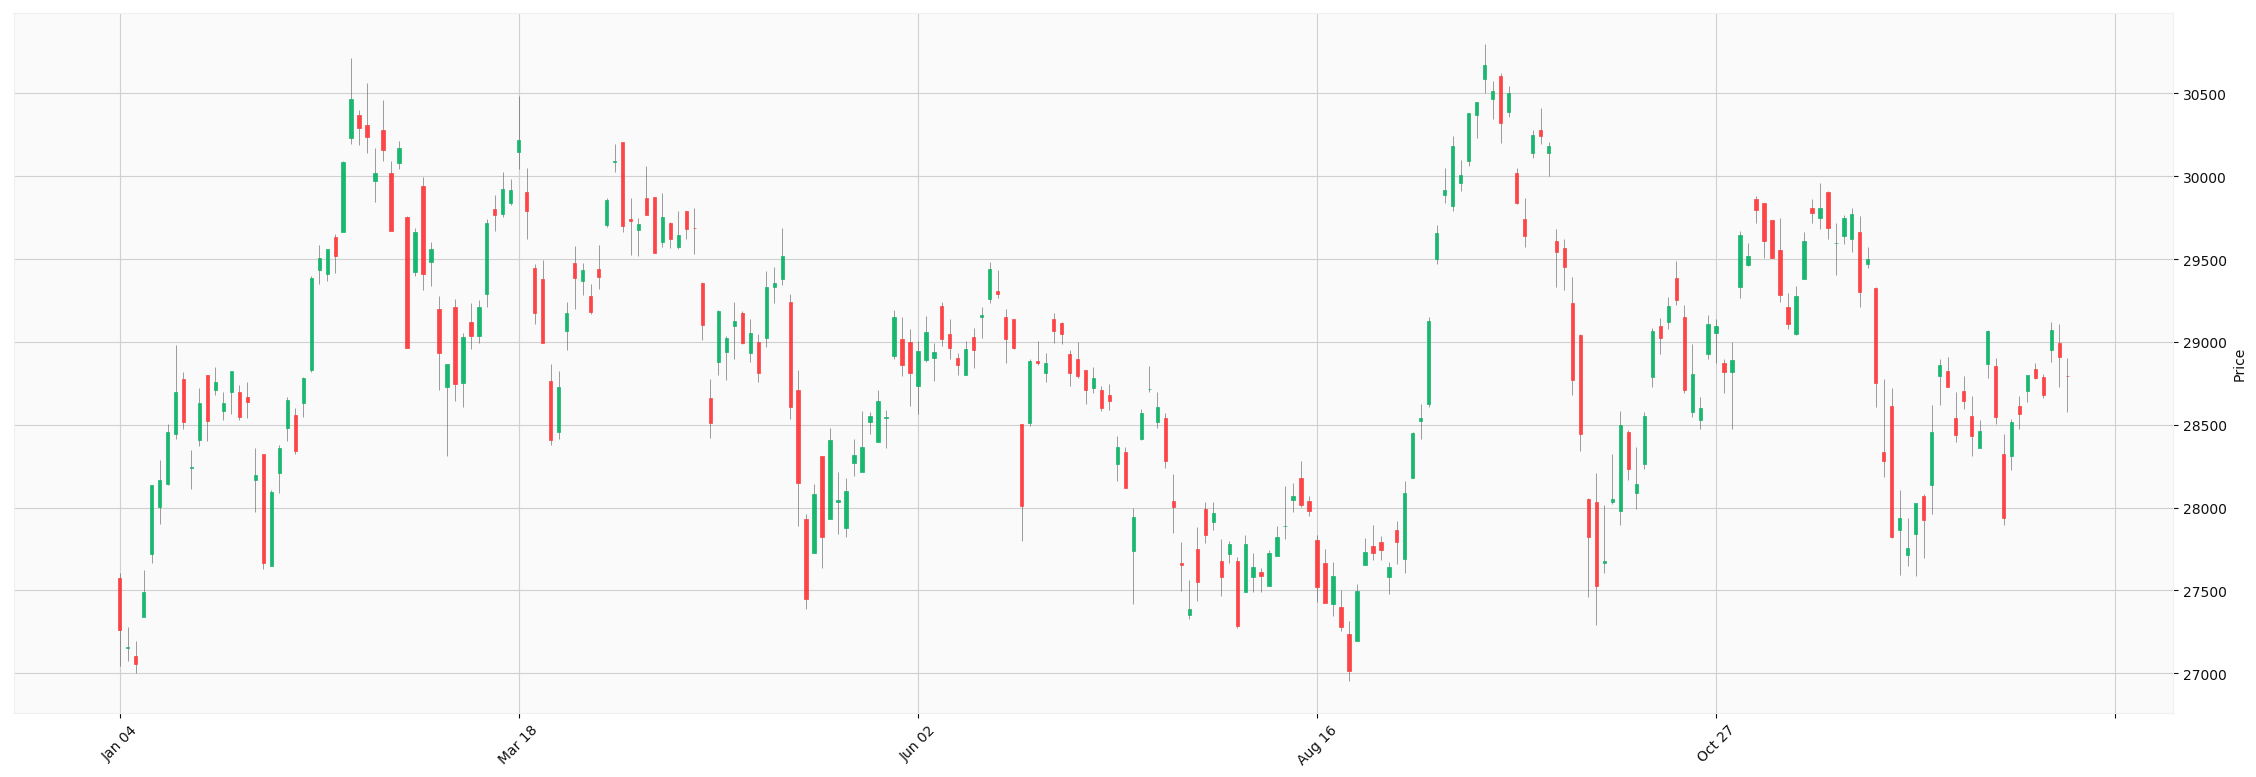

In [ ]:
mpf.plot(df, type='candle', figsize=(30,10), style='yahoo')

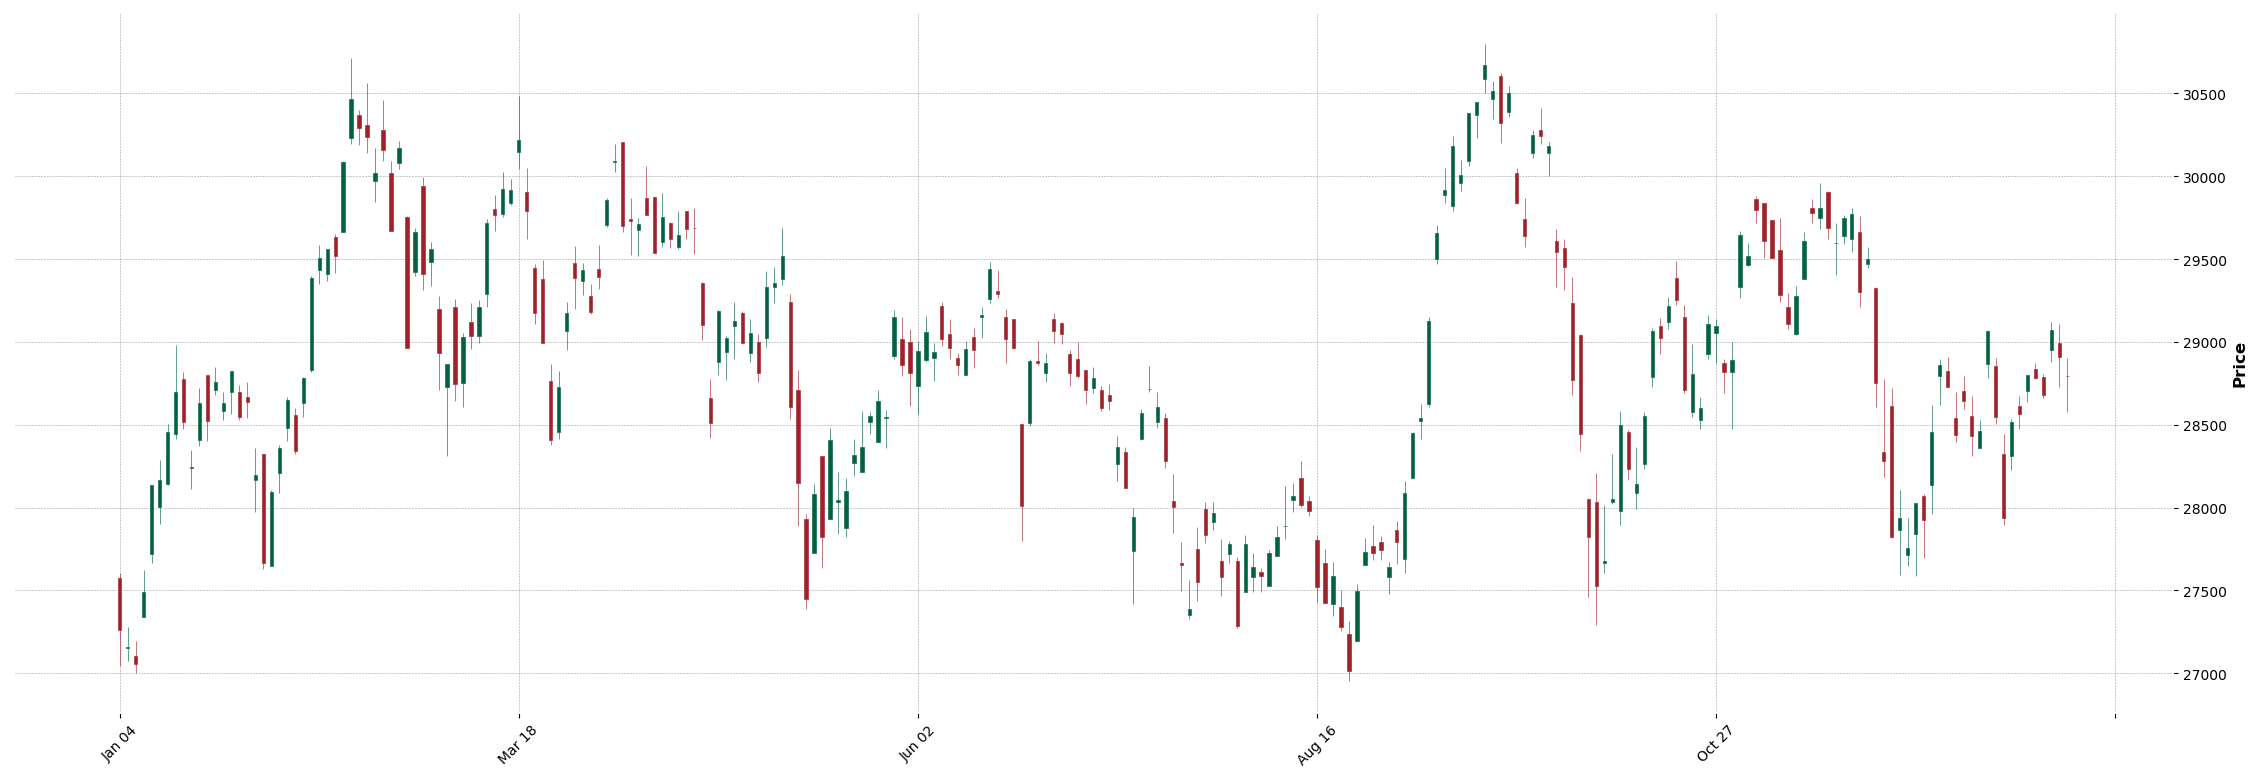

In [ ]:
mpf.plot(df, type='candle', figsize=(30,10), style='charles')

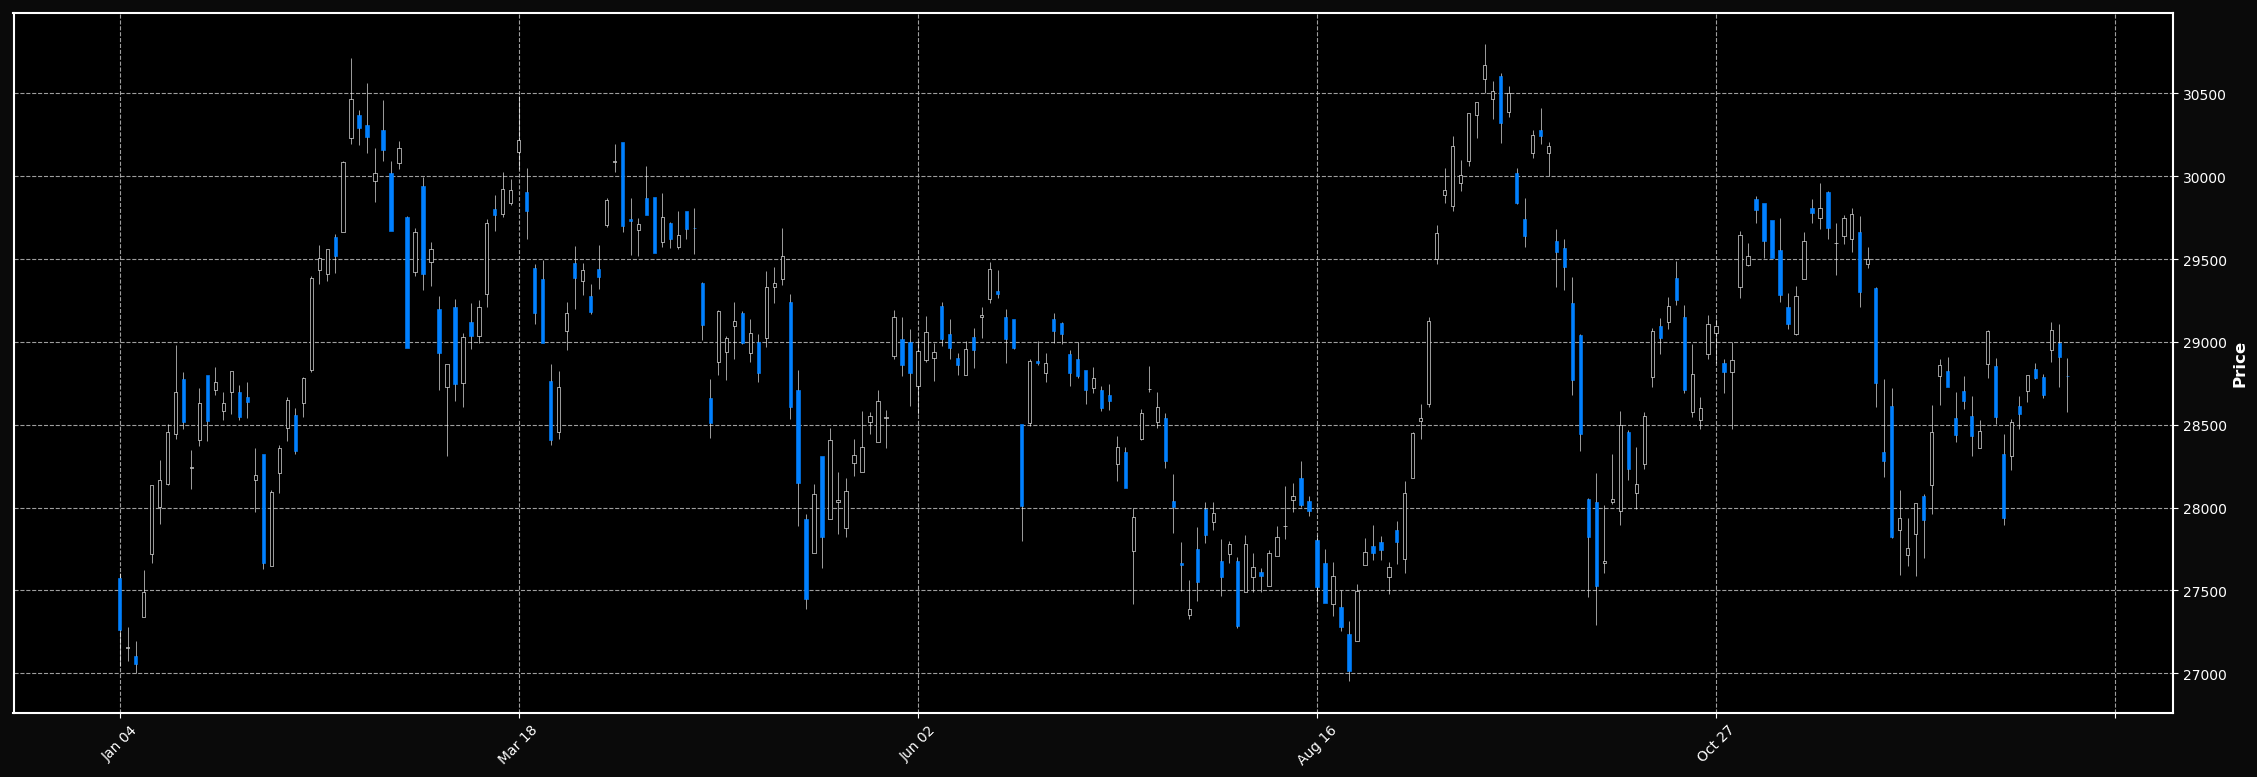

In [ ]:
mpf.plot(df, type='candle', figsize=(30,10), style='mike')

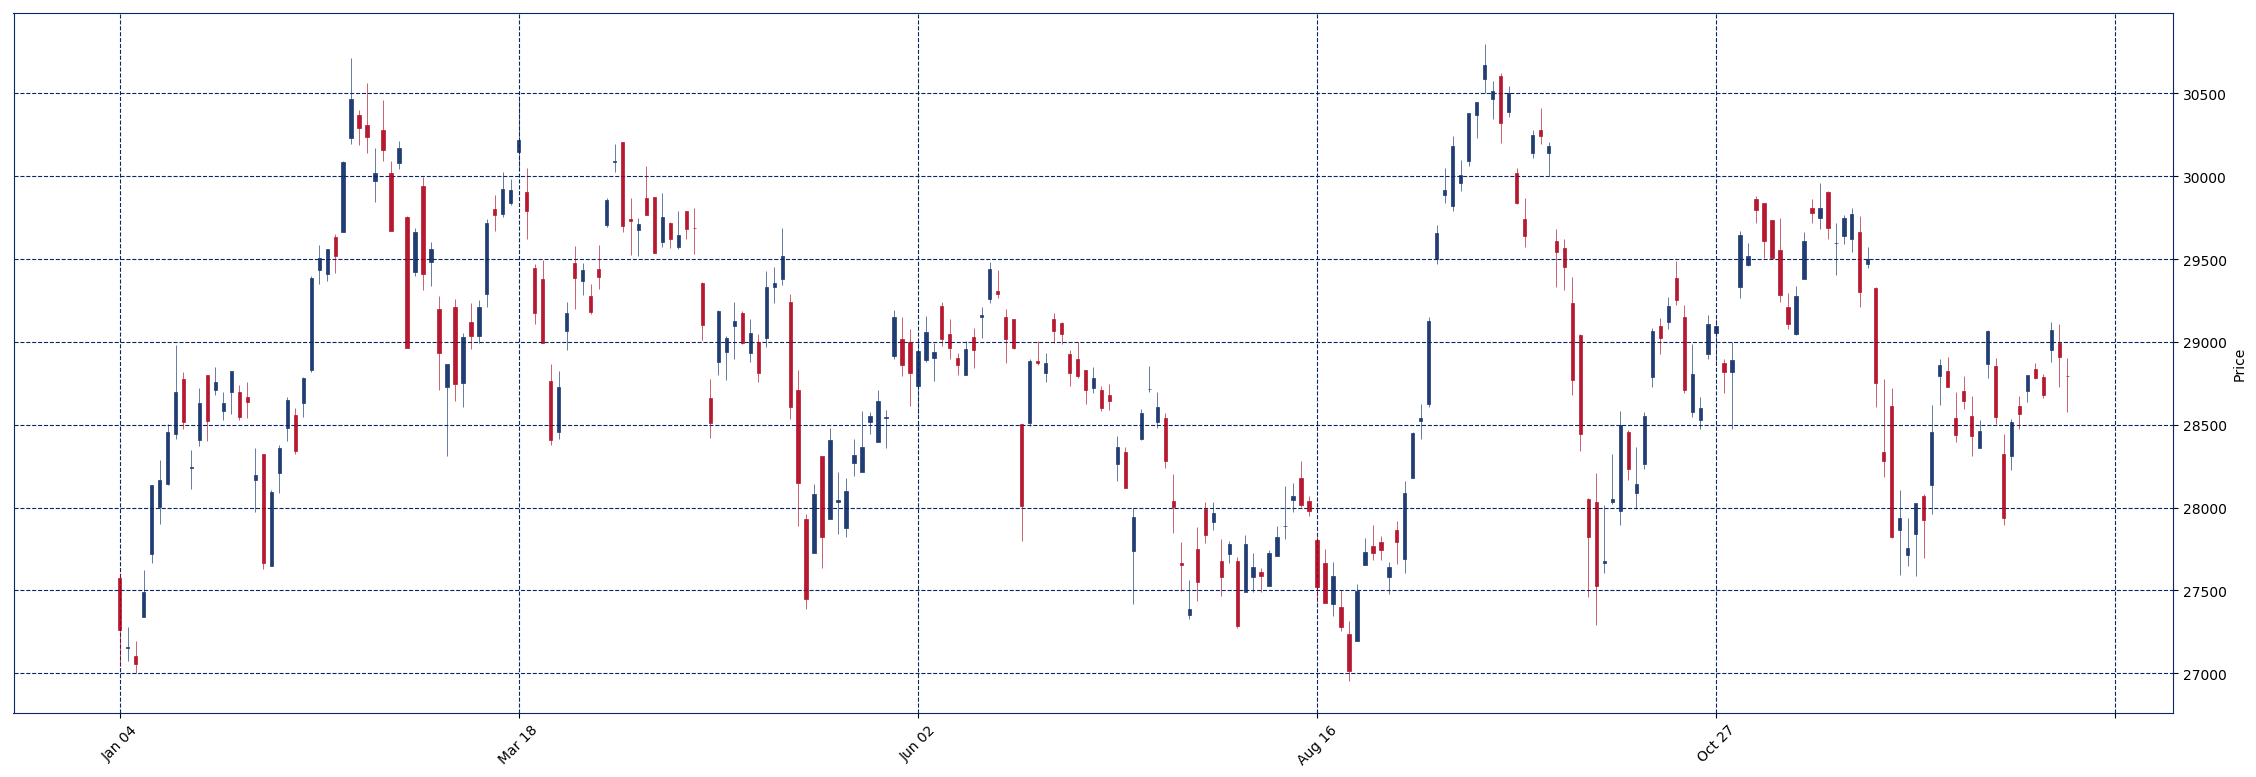

In [ ]:
mpf.plot(df, type='candle', figsize=(30,10), style='starsandstripes')

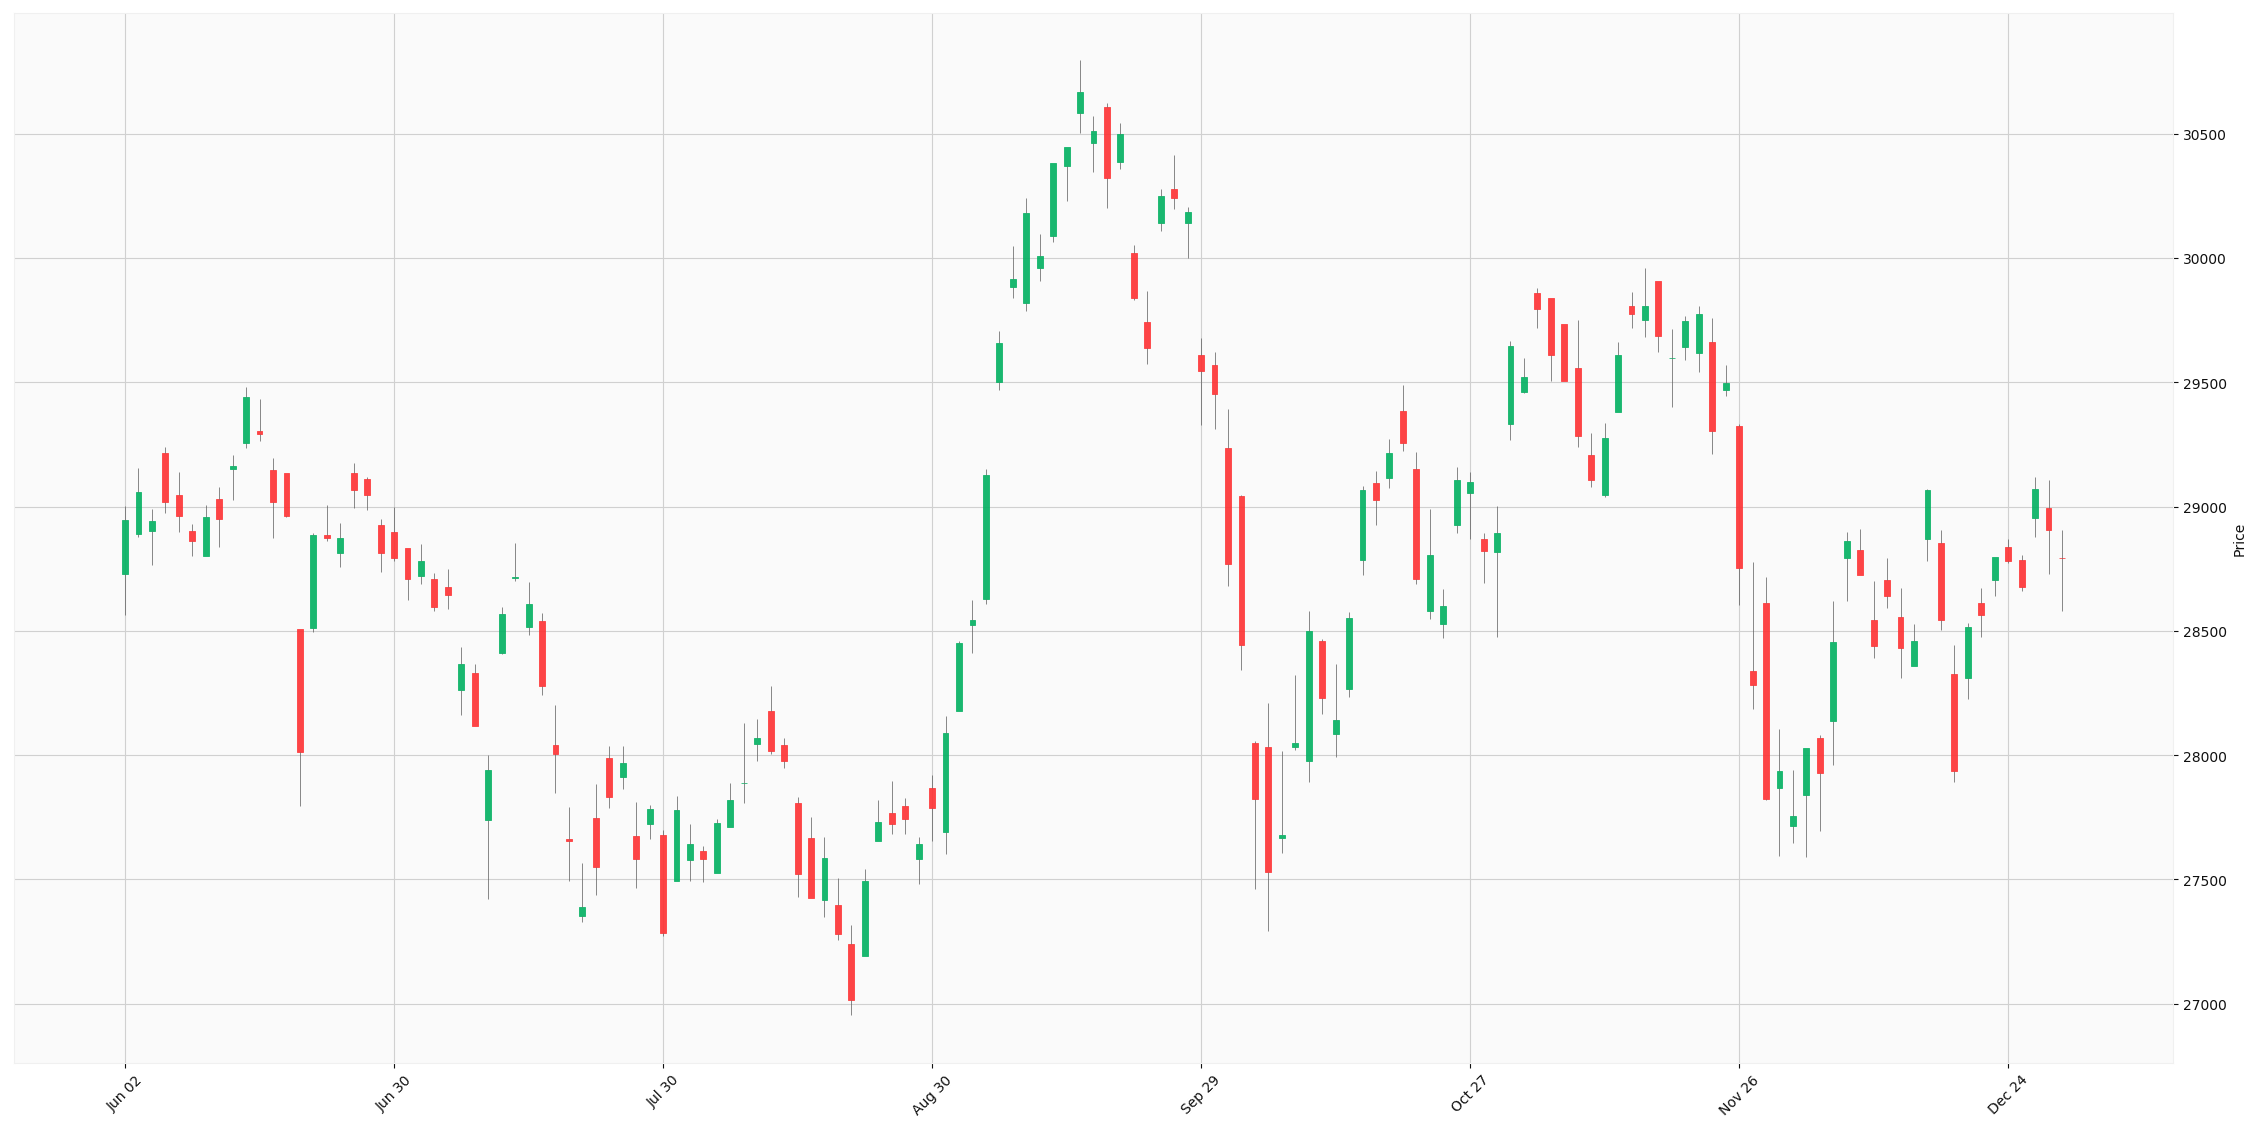

In [ ]:
df_candle = df[['High', 'Low', 'Open', 'Close', 'Volume']]
mpf.plot(df_candle[100:350], type='candle', style='yahoo', figsize=(30, 15))

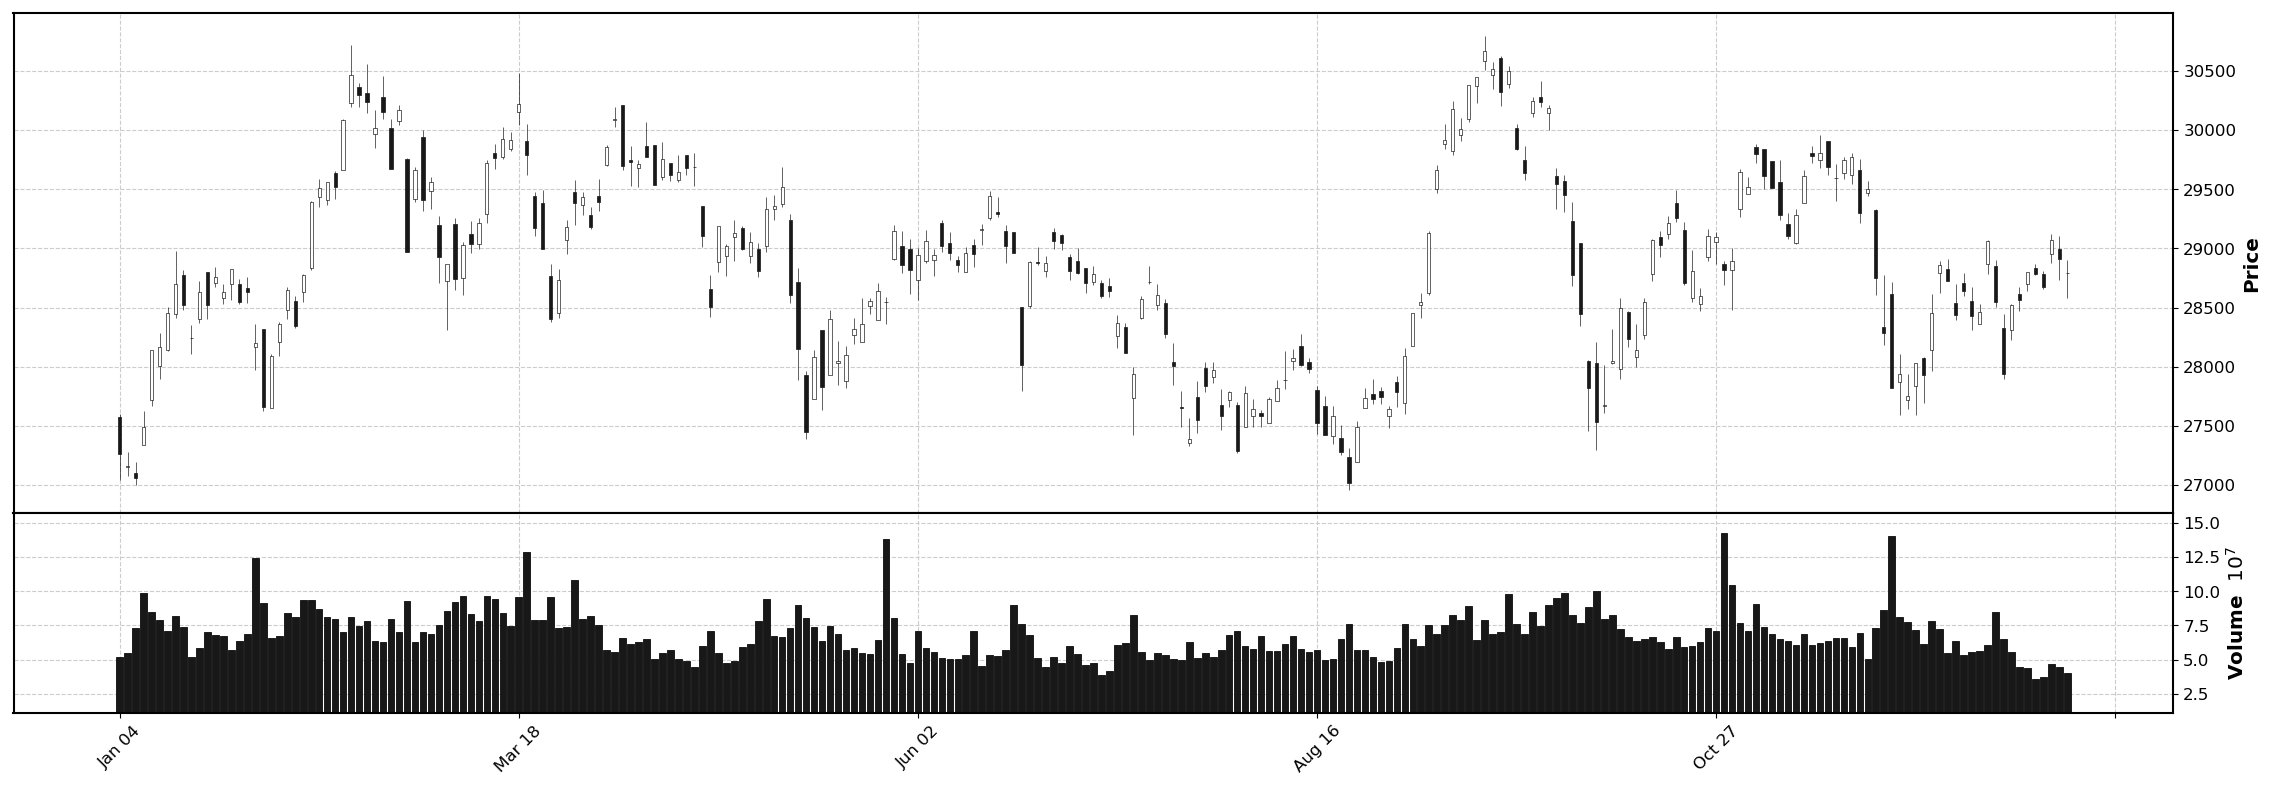

In [ ]:
# グラフに出来高を追記
mpf.plot(df, type='candle', figsize=(30,10), style='classic', volume=True)

In [ ]:
# ボリンジャーバンド
df['upper'], df['middle'], df['lower'] = ta.BBANDS(df['Adj Close'], timeperiod=25, nbdevup=2, nbdevdn=2, matype=0)

In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,upper,middle,lower
Date,,,,,,,,,
2021-12-24,28870.130859,28773.500000,28836.050781,28782.589844,35900000,28782.589844,29703.078475,28601.921016,27500.763557
2021-12-27,28805.279297,28658.820312,28786.330078,28676.460938,37500000,28676.460938,29557.512713,28559.144688,27560.776662
2021-12-28,29121.009766,28879.679688,28953.320312,29069.160156,47000000,29069.160156,29424.811623,28530.946719,27637.081815
2021-12-29,29106.279297,28729.609375,28995.730469,28906.880859,44700000,28906.880859,29366.771310,28515.115547,27663.459784
2021-12-30,28904.419922,28579.490234,28794.240234,28791.710938,40400000,28791.710938,29247.984038,28486.812813,27725.641587


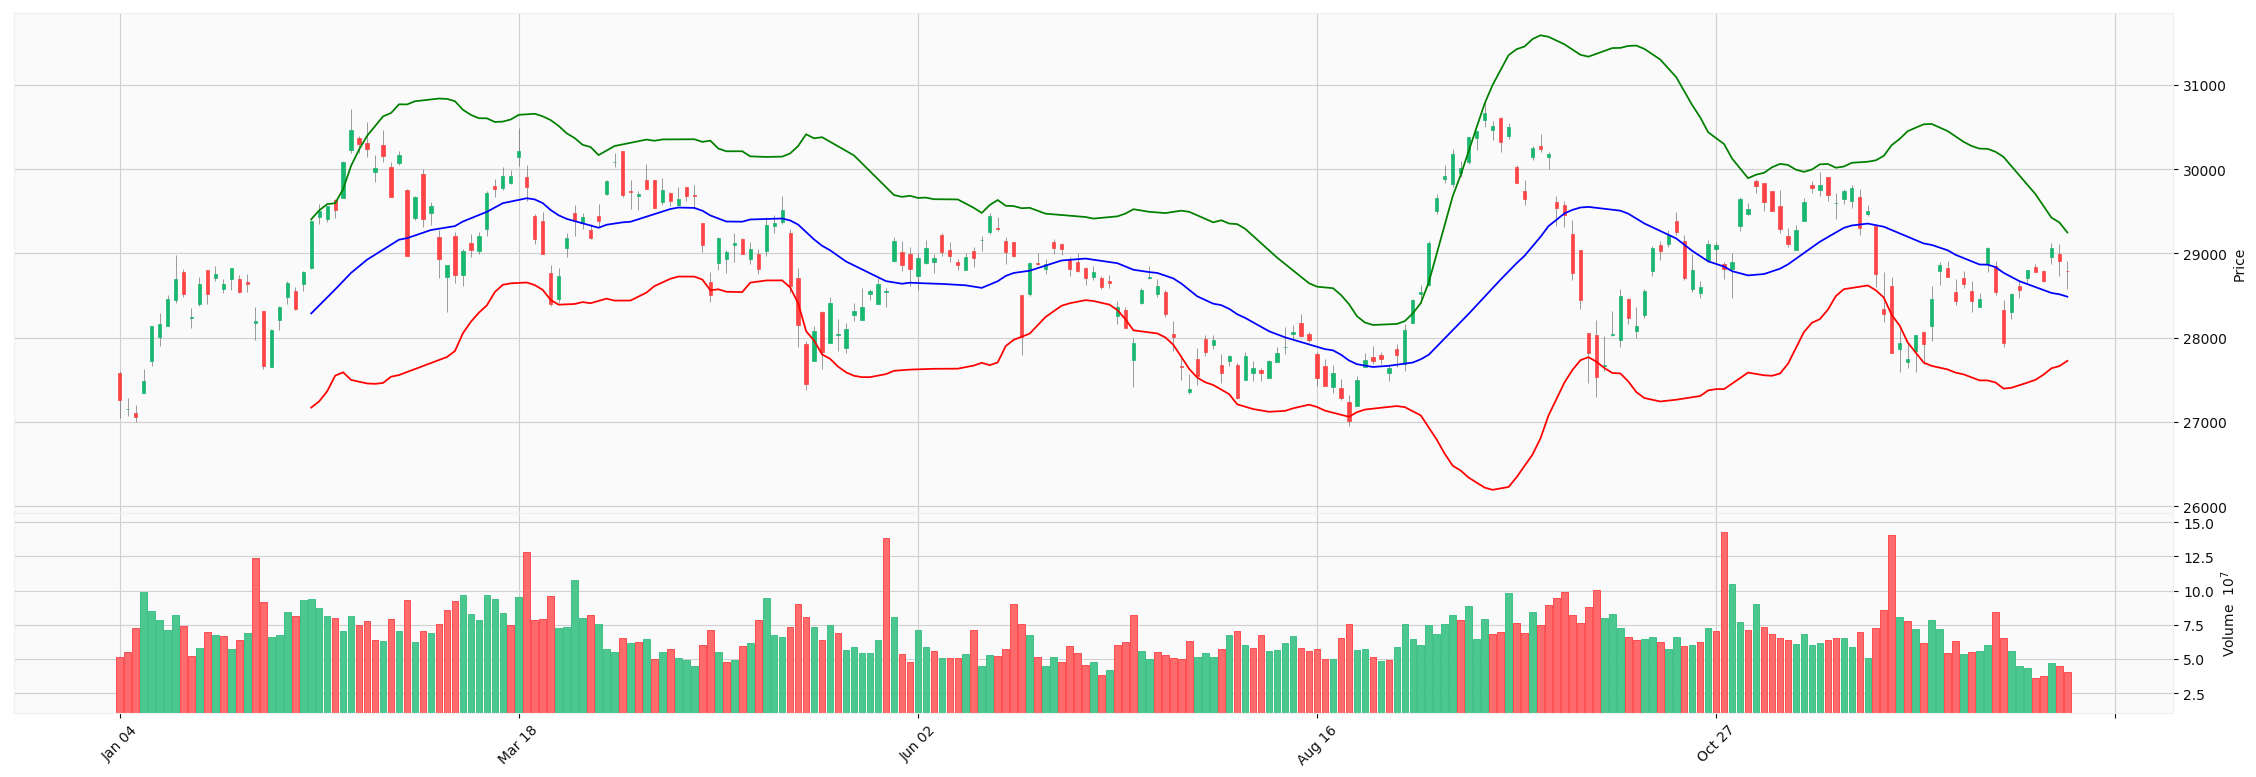

In [ ]:
apds = [mpf.make_addplot(df['upper'], color='g'),
        mpf.make_addplot(df['middle'], color='b'),
        mpf.make_addplot(df['lower'], color='r')
       ]

mpf.plot(df, type='candle', figsize=(30, 10), style='yahoo', volume=True, addplot=apds)

In [ ]:
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(df['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9)

In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,upper,middle,lower,macd,macdsignal,macdhist
Date,,,,,,,,,,,,
2021-12-24,28870.130859,28773.500000,28836.050781,28782.589844,35900000,28782.589844,29703.078475,28601.921016,27500.763557,-79.433695,-137.208686,57.774992
2021-12-27,28805.279297,28658.820312,28786.330078,28676.460938,37500000,28676.460938,29557.512713,28559.144688,27560.776662,-66.678746,-123.102698,56.423953
2021-12-28,29121.009766,28879.679688,28953.320312,29069.160156,47000000,29069.160156,29424.811623,28530.946719,27637.081815,-24.599247,-103.402008,78.802761
2021-12-29,29106.279297,28729.609375,28995.730469,28906.880859,44700000,28906.880859,29366.771310,28515.115547,27663.459784,-4.296002,-83.580807,79.284805
2021-12-30,28904.419922,28579.490234,28794.240234,28791.710938,40400000,28791.710938,29247.984038,28486.812813,27725.641587,2.472712,-66.370103,68.842815


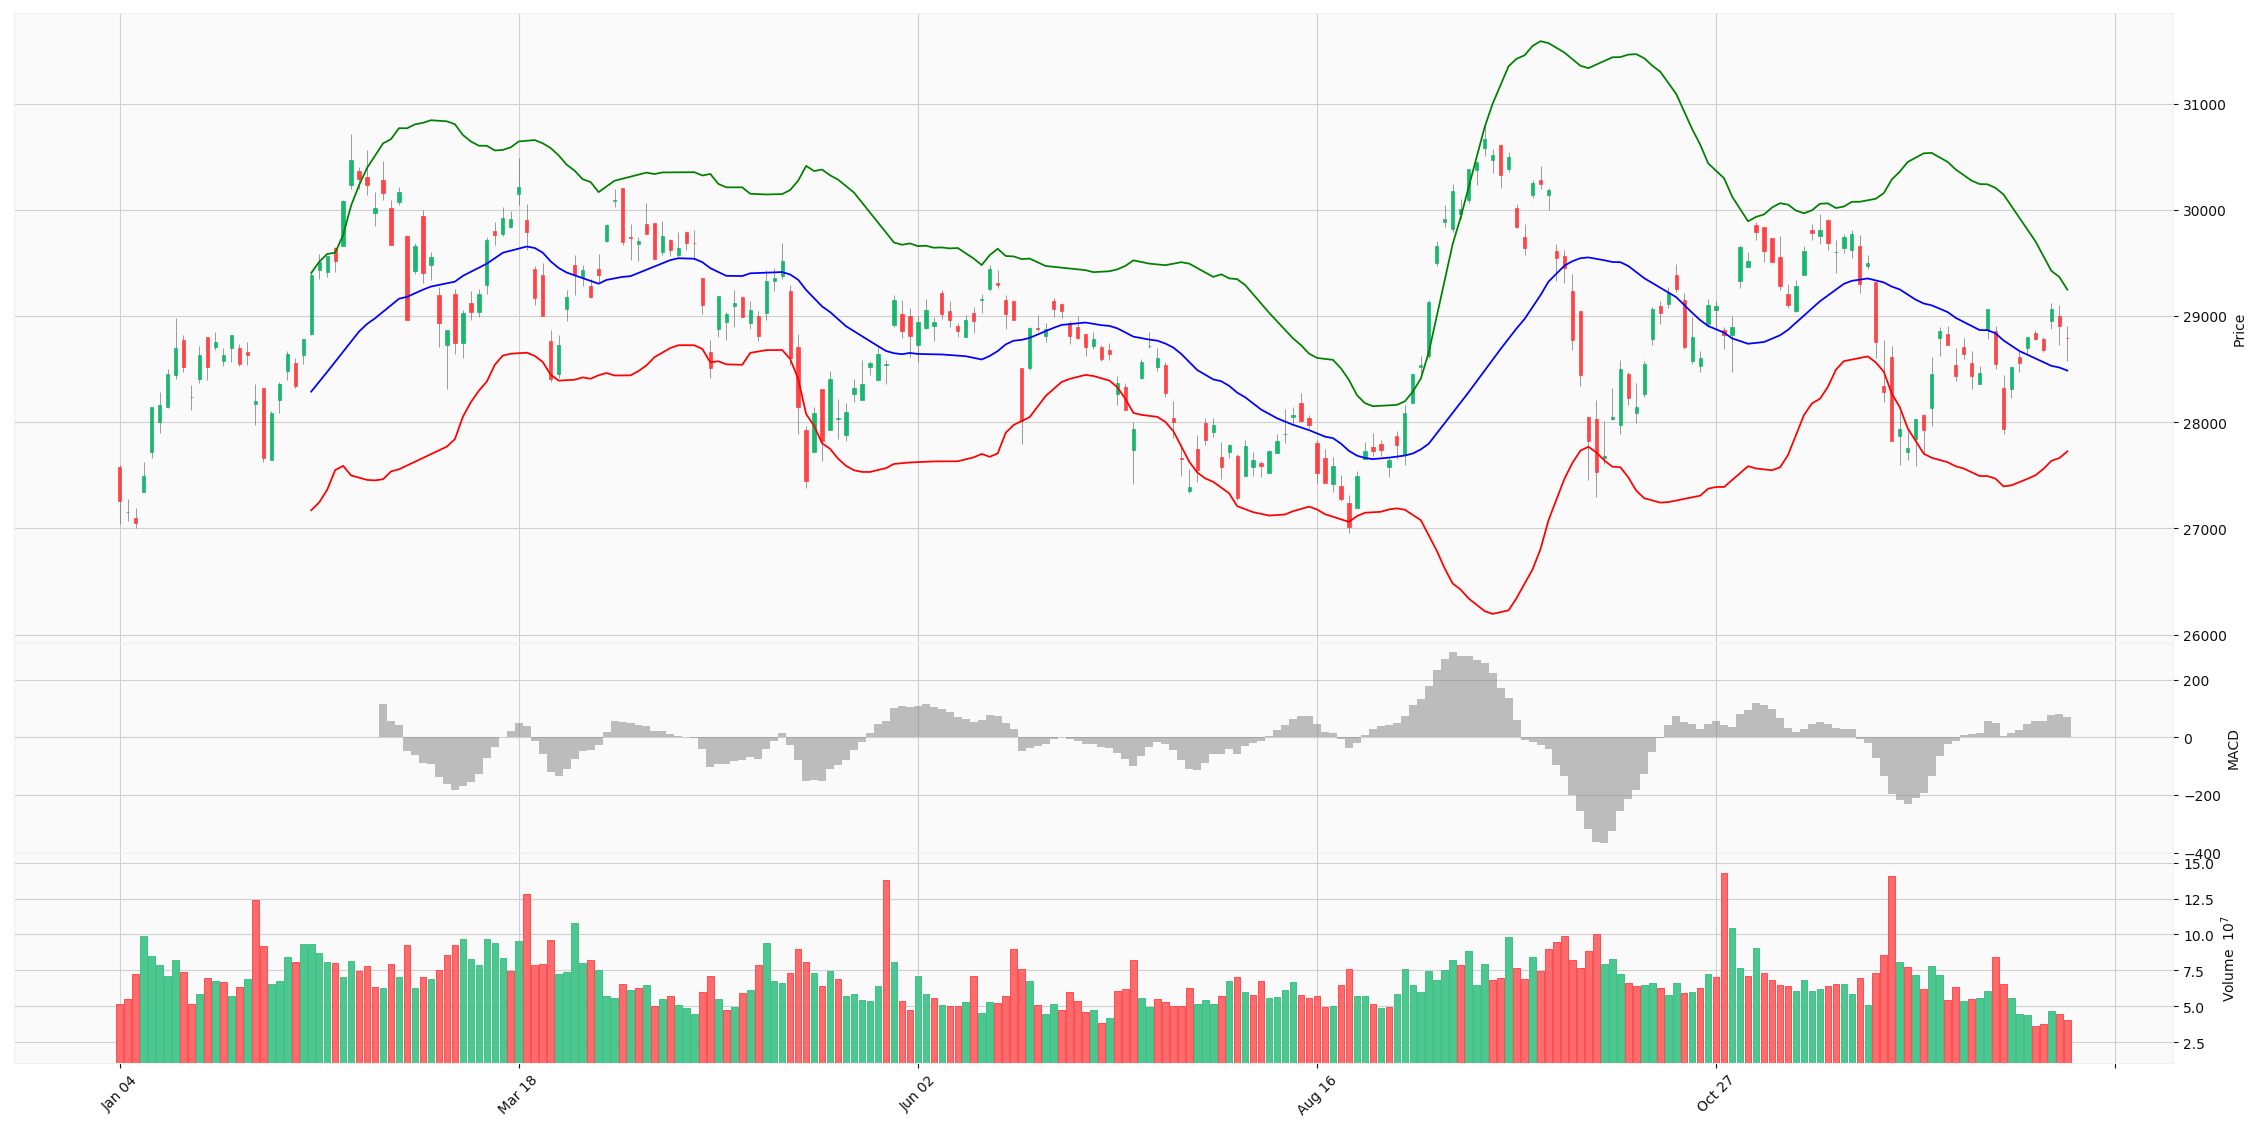

In [ ]:
apds = [mpf.make_addplot(df['upper'], color='g'),
        mpf.make_addplot(df['middle'], color='b'),
        mpf.make_addplot(df['lower'], color='r'),
        mpf.make_addplot(df['macdhist'], type='bar', color='gray',
                         width=1.0, panel=1, alpha=0.5, ylabel='MACD')
       ]

mpf.plot(df, type='candle', figsize=(30, 15), style='yahoo', volume=True,
         addplot = apds, volume_panel=2, panel_ratios=(3,1,1))

In [ ]:
# RSIデータフレームの追加
df['RSI'] = ta.RSI(df['Adj Close'], timeperiod=25)

In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,upper,middle,lower,macd,macdsignal,macdhist,RSI
Date,,,,,,,,,,,,,
2021-12-24,28870.130859,28773.500000,28836.050781,28782.589844,35900000,28782.589844,29703.078475,28601.921016,27500.763557,-79.433695,-137.208686,57.774992,50.061148
2021-12-27,28805.279297,28658.820312,28786.330078,28676.460938,37500000,28676.460938,29557.512713,28559.144688,27560.776662,-66.678746,-123.102698,56.423953,49.277821
2021-12-28,29121.009766,28879.679688,28953.320312,29069.160156,47000000,29069.160156,29424.811623,28530.946719,27637.081815,-24.599247,-103.402008,78.802761,52.162929
2021-12-29,29106.279297,28729.609375,28995.730469,28906.880859,44700000,28906.880859,29366.771310,28515.115547,27663.459784,-4.296002,-83.580807,79.284805,50.916256
2021-12-30,28904.419922,28579.490234,28794.240234,28791.710938,40400000,28791.710938,29247.984038,28486.812813,27725.641587,2.472712,-66.370103,68.842815,50.032270


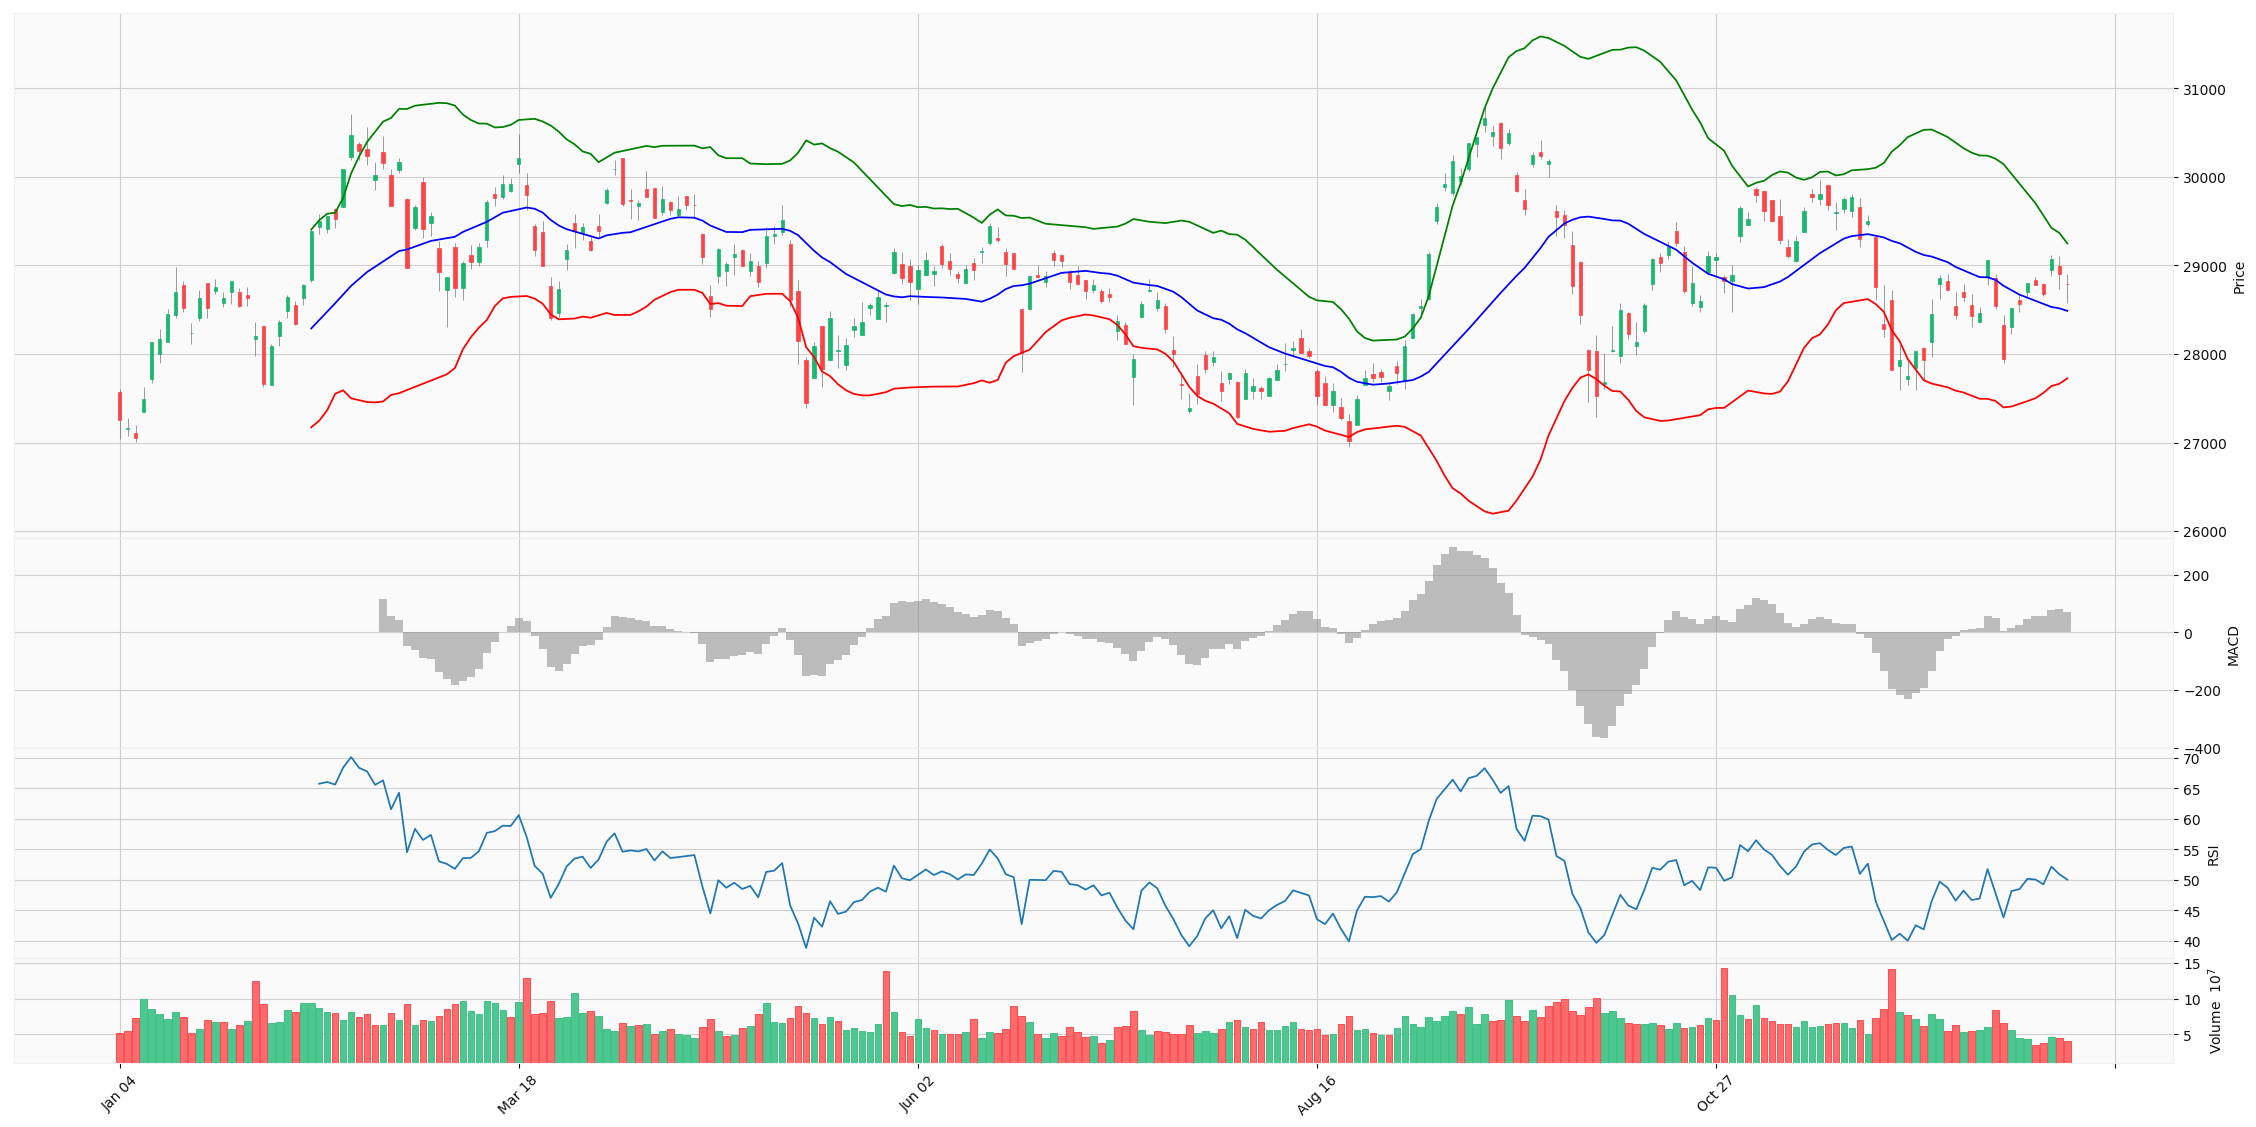

In [ ]:
apds = [mpf.make_addplot(df['upper'], color='g'),
        mpf.make_addplot(df['middle'], color='b'),
        mpf.make_addplot(df['lower'], color='r'),
        mpf.make_addplot(df['macdhist'], type='bar', color='gray',
                         width=1.0, panel=1, alpha=0.5, ylabel='MACD'),
        mpf.make_addplot(df['RSI'], panel=2, type='line', ylabel='RSI'),
       ]

mpf.plot(df, type='candle', figsize=(30, 15), style='yahoo', volume=True,
         addplot = apds, volume_panel=3, panel_ratios=(5,2,2,1))

In [ ]:
# グラフの保存
mpf.plot(df, type='candle', figsize=(30, 15), style='yahoo',
         volume=True, addplot = apds, volume_panel=3, panel_ratios=(5,2,2,1), savefig='finance')